# RC44 yacht
## Example
In cell below insert your initial parameters. If some of them are not required for your model, simply pass 0 value (for numbers). 
Some parameters are necessary only for specific cases like roughness (used by package when logarithmic profile is set) and they are omitted during computation. 

<div class="alert alert-block alert-warning"><b>ATTENTION:</b> do not delete keys in dictionaries and do not change their names. 
<br>
Make sure also that the length of your arrays match, like:  girths and chords</div>

More information can be found in code comments below.

In [9]:
# varaibles.py for jupyter
import os
import numpy as np
import time

mgirths =  np.array([0.00, 1./4, 1./2, 3./4, 1.00])
jgirths = np.array([0.00, 1./4, 1./2, 3./4, 1.00])

output_args = {
    'case_name': 'my_case_name',  # get name of the current file
    'case_dir': os.path.abspath(''), # get dir of the current file
    'name': os.path.join("results_example_jib_and_mainsail_vlm", time.strftime("%Y-%m-%d_%Hh%Mm%Ss")),
    'file_name': 'results_RC44_GENOA_VLM', # name of xlsx excel file
}

solver_args = {
    'n_spanwise':  20,  # No of control points (above the water) per sail, recommended: 50
    'n_chordwise': 10, # No of control points (above the water) per sail, recommended: 50
    'interpolation_type': "spline",  # either "spline" or "linear"
    'LLT_twist': "real_twist",  # defines how the Lifting Line discretize the sail twist.
}

conditions_args = {
    'leeway_deg': 0.0,    # [deg] # dryf polsku napisaC!
    'heel_deg': 13.0,     # [deg] # przechył
    'SOG_yacht': 3.4460,   # [m/s] yacht speed - speed over ground (leeway is a separate variable)
    'tws_ref': 3.0860,     # [m/s] true wind speed
    'alpha_true_wind_deg': 45.0,   # [deg] true wind angle (with reference to course over ground) => Course Wind Angle to the boat track = true wind angle to centerline + Leeway
    'reference_water_level_for_wind_profile': -1.23,  # [m] this is an attempt to mimick the deck effect
    # by lowering the sheer_above_waterline
    # while keeping the wind profile as in original geometry
    # this shall be negative (H = sail_ctrl_point - water_level)
    'wind_exp_coeff': 0.1,  # [-] coefficient to determine the exponential wind profile
    'wind_reference_measurment_height': 22.0,  # [m] reference height for exponential wind profile
    'rho': 1.184,  # air density [kg/m3]
    'wind_profile': 'exponential', # allowed: 'exponential' or 'flat' or 'logarithmic'
    'roughness': 0.05, # for logarithmic profile only 
}

rig_args = {
    'main_sail_luff': 17.52,  # [m] # lik przedni / krawędź natarcia
    'jib_luff': 17.40,  # [m] # fok
    'foretriangle_height': 16.98,  # [m]
    'foretriangle_base': 5.13,  # [m]
    'sheer_above_waterline': 1.23,#[m]
    'boom_above_sheer': 1.41, # [m],
    'rake_deg': 95. ,  # rake angle [deg]
    'mast_LOA': 0.24,  # [m]
    'sails_def': 'jib_and_main', # definition of sail set, possible: 'jib' or 'main' or 'jib_and_main'
}
# INFO for camber:
# First digit describing maximum camber as percentage of the chord.
# Second digit describing the distance of maximum camber from the airfoil leading edge in tenths of the chord.
main_sail_args = {
    'girths' : mgirths, #  procentowa wysokośc żagla, procentowa odległość sekcji wzdłuż rozpiętości żagla
    'chords': np.array([5.37, 4.98, 4.45, 3.72, 2.49]), # cięcikwa danej sekcji w [m] 
    'centerline_twist_deg': 17. * mgirths + 0, # skret żagla
    'camber': 1*np.array([0.028, 0.083, 0.095, 0.087, 0.013]), # wybrzuszenie
    'camber_distance_from_luff': np.array([0.5, 0.5, 0.5, 0.5, 0.5]), # 
}
 
jib_sail_args = {
    'centerline_twist_deg': 24. * jgirths + 8.6,
    'girths': jgirths,
    'chords': np.array([7.32, 5.39, 3.55, 1.76, 0.09]),
    'camber': 1*np.array([0.055, 0.1, 0.13, 0.131, 0.01]),
    'camber_distance_from_luff': np.array([0.5, 0.5, 0.5, 0.5, 0.5]), # starting from leading edge   
}        

# REFERENCE CSYS
# The origin of the default CSYS is located @ waterline level and aft face of the mast
# The positive x-coord: towards stern
# The positive y-coord: towards leeward side
# The positive z-coord: above the water
# To shift the default CSYS, adjust the 'reference_level_for_moments' variable.
# Shifted CSYS = original + reference_level_for_moments
# As a results the moments will be calculated around the new origin.

# yaw_reference [m] - distance from the aft of the mast towards stern, at which the yawing moment is calculated.
# sway_reference [m] - distance from the aft of the mast towards leeward side. 0 for symmetric yachts ;)
# heeling_reference [m] - distance from the water level,  at which the heeling moment is calculated.
csys_args = {
    'reference_level_for_moments': np.array([0, 0, 0]),  # [yaw_reference, sway_reference, heeling_reference]
}

# GEOMETRY OF THE KEEL
# to estimate heeling moment from keel, does not influence the optimizer.
# reminder: the z coord shall be negative (under the water)
keel_args={
    'center_of_lateral_resistance_upright': np.array([0, 0, -1.25]),  # [m] the coordinates for a yacht standing in upright position
}  


<div class="alert alert-block alert-warning">
<b>Run cell below twice:</b> Run cell below twice before running other cells. Output below is expected to always appear at first time importing pySailingVLM:
<br><br>
    
<em>   
/home/user/miniconda3/envs/mgr_test/lib/python3.10/site-packages/numba/core/lowering.py:107: NumbaDebugInfoWarning: Could not find source for function: <function __numba_array_expr_0x7f01d6a1e9e0 at 0x7f01d6cfa680>. Debug line information may be inaccurate.warnings.warn(NumbaDebugInfoWarning(msg))
</em> 
<br>
</div>

In [10]:
import shutil
from pySailingVLM.rotations.csys_transformations import CSYS_transformations
from pySailingVLM.yacht_geometry.hull_geometry import HullGeometry
from pySailingVLM.results.save_utils import save_results_to_file
from pySailingVLM.solver.panels_plotter import display_panels_xyz_and_winds
from pySailingVLM.results.inviscid_flow import InviscidFlowResults
from pySailingVLM.solver.vlm import Vlm
from pySailingVLM.runner.sail import Wind, Sail
from pySailingVLM.runner.container import Output, Rig, Conditions, Solver, MainSail, JibSail, Csys, Keel
from pySailingVLM.solver.panels_plotter import plot_cp

In [12]:
out = Output(**output_args)
conditions = Conditions(**conditions_args)
solver = Solver(**solver_args)
main = MainSail(**main_sail_args)
jib = JibSail(**jib_sail_args) # j2 = JibSail(centerline_twist_deg= 15. * jgirths + 7, girths= jgirths) set centerline_twist_deg and girths, rest is default

csys = Csys(**csys_args)
keel = Keel(**keel_args)
rig = Rig(**rig_args)

csys_transformations = CSYS_transformations(
    conditions.heel_deg, conditions.leeway_deg,
    v_from_original_xyz_2_reference_csys_xyz=csys.reference_level_for_moments)


w = Wind(conditions)
s = Sail(solver, rig, main, jib, csys_transformations)
sail_set = s.sail_set
hull = HullGeometry(rig.sheer_above_waterline, rig.foretriangle_base, csys_transformations, keel.center_of_lateral_resistance_upright)
myvlm = Vlm(sail_set.panels, solver.n_chordwise, solver.n_spanwise, conditions.rho, w.profile, sail_set.trailing_edge_info, sail_set.leading_edge_info)

inviscid_flow_results = InviscidFlowResults(sail_set, csys_transformations, myvlm)
inviscid_flow_results.estimate_heeling_moment_from_keel(hull.center_of_lateral_resistance)

Cell below displays computations and saves integrals to output file.
<div class="alert alert-block alert-info">
<b>Tip:</b> For proper rendering of matplotlib figures in jupyter notebooks insert <em>%matplotlib widget</em> before calling plot functions.
</div>

Preparing visualization.


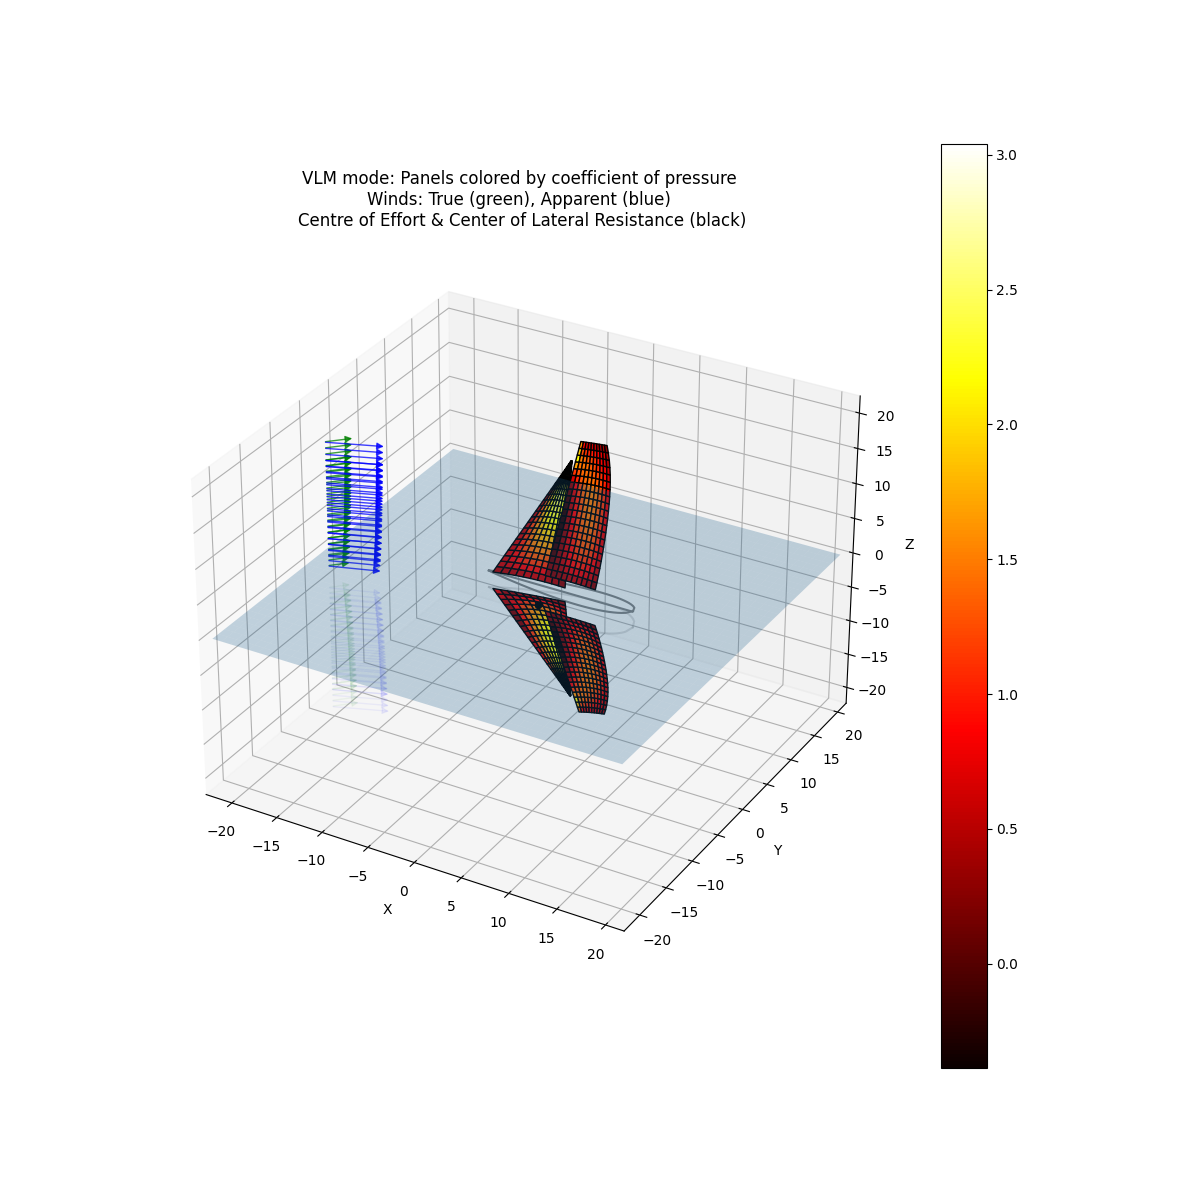

In [13]:
%matplotlib widget
print("Preparing visualization.")   
display_panels_xyz_and_winds(myvlm, inviscid_flow_results, myvlm.inlet_conditions, hull, show_plot=True) # add show_apparent_induced_wind=True for apparent + induced wind 
df_components, df_integrals, df_inlet_IC = save_results_to_file(myvlm, csys_transformations, inviscid_flow_results, s.sail_set, out.name, out.file_name)

Lets see our integrals :)

In [14]:
print(f"-------------------------------------------------------------")
print(f"Notice:\n"
  f"\tThe forces [N] and moments [Nm] are without profile drag.\n"
  f"\tThe the _COG_ CSYS is aligned in the direction of the yacht movement (course over ground).\n"
  f"\tThe the _COW_ CSYS is aligned along the centerline of the yacht (course over water).\n"
  f"\tNumber of panels (sail s.sail_set with mirror): {s.sail_set.panels.shape}")

df_integrals

-------------------------------------------------------------
Notice:
	The forces [N] and moments [Nm] are without profile drag.
	The the _COG_ CSYS is aligned in the direction of the yacht movement (course over ground).
	The the _COW_ CSYS is aligned along the centerline of the yacht (course over water).
	Number of panels (sail s.sail_set with mirror): (800, 4, 3)


,Quantity,Value
0,F_jib_total_COG.x,-464.961532
1,F_jib_total_COG.y,1390.399456
2,F_jib_total_COG.z,-160.136139
3,F_main_sail_total_COG.x,-216.509181
4,F_main_sail_total_COG.y,1297.021743
5,F_main_sail_total_COG.z,-319.237407
6,F_sails_total_COG.x,-681.470712
7,F_sails_total_COG.y,2687.421199
8,F_sails_total_COG.z,-479.373546
9,F_sails_total_COW.x,-681.470712


Compute aerodynamic parameters:

In [15]:
sails_Cxyz = myvlm.get_Cxyz(w, 1.0)
print(f"Cxyz for {rig.sails_def}")
for idx, c in enumerate(sails_Cxyz):
    print(f"C[{idx}]: {c}")

Cxyz for jib_and_main
C[0]: [-2.1618281   6.46463075 -0.74454935]
C[1]: [-0.79504634  4.7628114  -1.17227608]


Make model plot in 2D colored by pressure coefficients:

In [16]:
from pySailingVLM.solver.panels_plotter import plot_cp
plot_cp(sail_set.zero_mesh, myvlm.p_coeffs, out.name)

Loading BokehJS ...

Thats all. Experiment and play with this code on your own.